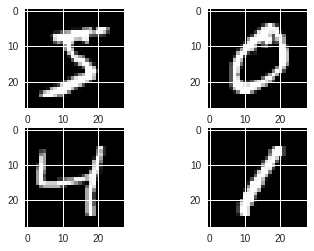

In [2]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import keras
import numpy as np
from keras.datasets import cifar10
from keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D, Dense
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from skimage.transform import resize
from IPython import embed

import pandas as pd
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint


import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [9]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2811 - acc: 0.9207 - val_loss: 0.1411 - val_acc: 0.9573
Epoch 2/10
 - 7s - loss: 0.1117 - acc: 0.9679 - val_loss: 0.0912 - val_acc: 0.9711
Epoch 3/10
 - 7s - loss: 0.0715 - acc: 0.9798 - val_loss: 0.0780 - val_acc: 0.9773
Epoch 4/10
 - 6s - loss: 0.0502 - acc: 0.9859 - val_loss: 0.0745 - val_acc: 0.9767
Epoch 5/10
 - 7s - loss: 0.0372 - acc: 0.9892 - val_loss: 0.0674 - val_acc: 0.9788
Epoch 6/10
 - 7s - loss: 0.0266 - acc: 0.9928 - val_loss: 0.0611 - val_acc: 0.9810
Epoch 7/10
 - 7s - loss: 0.0206 - acc: 0.9947 - val_loss: 0.0616 - val_acc: 0.9809
Epoch 8/10
 - 7s - loss: 0.0140 - acc: 0.9970 - val_loss: 0.0618 - val_acc: 0.9805
Epoch 9/10
 - 7s - loss: 0.0105 - acc: 0.9978 - val_loss: 0.0579 - val_acc: 0.9813
Epoch 10/10
 - 7s - loss: 0.0078 - acc: 0.9987 - val_loss: 0.0578 - val_acc: 0.9820

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [14]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 61s - loss: 0.2253 - acc: 0.9356 - val_loss: 0.0774 - val_acc: 0.9759
Epoch 2/10
 - 61s - loss: 0.0709 - acc: 0.9786 - val_loss: 0.0440 - val_acc: 0.9851
Epoch 3/10
 - 61s - loss: 0.0506 - acc: 0.9846 - val_loss: 0.0432 - val_acc: 0.9852
Epoch 4/10
 - 61s - loss: 0.0389 - acc: 0.9879 - val_loss: 0.0404 - val_acc: 0.9876
Epoch 5/10
 - 61s - loss: 0.0321 - acc: 0.9900 - val_loss: 0.0340 - val_acc: 0.9887
Epoch 6/10
 - 61s - loss: 0.0262 - acc: 0.9918 - val_loss: 0.0333 - val_acc: 0.9890
Epoch 7/10
 - 61s - loss: 0.0216 - acc: 0.9929 - val_loss: 0.0360 - val_acc: 0.9884
Epoch 8/10
 - 61s - loss: 0.0185 - acc: 0.9943 - val_loss: 0.0328 - val_acc: 0.9889
Epoch 9/10
 - 60s - loss: 0.0150 - acc: 0.9953 - val_loss: 0.0328 - val_acc: 0.9891
Epoch 10/10
 - 60s - loss: 0.0137 - acc: 0.9959 - val_loss: 0.0333 - val_acc: 0

In [15]:
 ###########################################################
  # load data cifar10
 from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

170500096/170498071 [==============================] - 19s 0us/step
(50000, 3, 32, 32) (50000, 1) (10000, 3, 32, 32) (10000, 1)


In [16]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# flatten 32*32*3 images to a 3072 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
print(num_pixels)
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


3072


In [17]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 72s - loss: 13.1319 - acc: 0.1484 - val_loss: 13.2966 - val_acc: 0.1371
Epoch 2/10
 - 72s - loss: 12.9826 - acc: 0.1609 - val_loss: 13.0714 - val_acc: 0.1494
Epoch 3/10
 - 72s - loss: 13.0585 - acc: 0.1585 - val_loss: 13.0101 - val_acc: 0.1674
Epoch 4/10
 - 72s - loss: 9.1996 - acc: 0.2049 - val_loss: 1.8384 - val_acc: 0.3424
Epoch 5/10
 - 72s - loss: 1.7406 - acc: 0.3792 - val_loss: 1.6886 - val_acc: 0.4001
Epoch 6/10
 - 72s - loss: 1.6374 - acc: 0.4198 - val_loss: 1.5974 - val_acc: 0.4287
Epoch 7/10
 - 72s - loss: 1.5903 - acc: 0.4392 - val_loss: 1.5977 - val_acc: 0.4352
Epoch 8/10
 - 71s - loss: 1.5395 - acc: 0.4556 - val_loss: 1.5403 - val_acc: 0.4585
Epoch 9/10
 - 71s - loss: 1.5072 - acc: 0.4663 - val_loss: 1.5686 - val_acc: 0.4415
Epoch 10/10
 - 72s - loss: 1.4723 - acc: 0.4802 - val_loss: 1.5204 - val_acc: 0.4588
Baseline Error: 54.12%


In [18]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 3, 32, 32).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 3, 32, 32).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(3, 32, 32), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
print(num_classes)


10


In [19]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 94s - loss: 1.5828 - acc: 0.4329 - val_loss: 1.3342 - val_acc: 0.5314
Epoch 2/10
 - 92s - loss: 1.2802 - acc: 0.5497 - val_loss: 1.2424 - val_acc: 0.5567
Epoch 3/10
 - 92s - loss: 1.1645 - acc: 0.5926 - val_loss: 1.1517 - val_acc: 0.5944
Epoch 4/10
 - 93s - loss: 1.0836 - acc: 0.6222 - val_loss: 1.1268 - val_acc: 0.6066
Epoch 5/10
 - 92s - loss: 1.0267 - acc: 0.6412 - val_loss: 1.0697 - val_acc: 0.6240
Epoch 6/10
 - 92s - loss: 0.9674 - acc: 0.6626 - val_loss: 1.0494 - val_acc: 0.6349
Epoch 7/10
 - 93s - loss: 0.9339 - acc: 0.6769 - val_loss: 1.0121 - val_acc: 0.6477
Epoch 8/10
 - 92s - loss: 0.8987 - acc: 0.6876 - val_loss: 1.0159 - val_acc: 0.6422
Epoch 9/10
 - 92s - loss: 0.8646 - acc: 0.6989 - val_loss: 1.0165 - val_acc: 0.6535
Epoch 10/10
 - 92s - loss: 0.8313 - acc: 0.7105 - val_loss: 0.9854 - val_acc: 0.6624
CNN Error: 33.76%


In [20]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#Load Training and Test data
# Input image dimensions.
input_shape = X_train.shape[1:]

# Normalize data.
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(50000, 3, 32, 32) (10000, 3, 32, 32) (50000, 10) (10000, 10)


In [55]:
# a = resize_image_arr(X_train)
# a1 = resize_image_arr(X_test)
# b = resize_image_arr(y_train)
# b1 = resize_image_arr(y_test)
# print(a.shape,a1.shape,b.shape,b1.shape)
import scipy
new_shape = (64,64,3)
X_train_new = np.empty(shape=(X_train.shape[0],)+new_shape)
for idx in range(X_train.shape[0]):
    X_train_new[idx] = scipy.misc.imresize(X_train[idx], new_shape)

X_test_new = np.empty(shape=(X_test.shape[0],)+new_shape)
for idx in range(X_test.shape[0]):
    X_test_new[idx] = scipy.misc.imresize(X_test[idx], new_shape)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


In [21]:
# print(X_train_new.shape,X_test_new.shape,y_train.shape,y_test.shape)
img_height,img_width = 32,32 
num_classes = 10
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (3,32,32))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [22]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 30, batch_size = 64)

Epoch 1/30
50000/50000 [==============================] - 95s 2ms/step - loss: 0.7402 - acc: 0.7449
Epoch 2/30
50000/50000 [==============================] - 92s 2ms/step - loss: 0.7310 - acc: 0.7485
Epoch 3/30
50000/50000 [==============================] - 93s 2ms/step - loss: 0.7222 - acc: 0.7522
Epoch 4/30
50000/50000 [==============================] - 92s 2ms/step - loss: 0.7127 - acc: 0.7558
Epoch 5/30
50000/50000 [==============================] - 92s 2ms/step - loss: 0.7033 - acc: 0.7572
Epoch 6/30
50000/50000 [==============================] - 93s 2ms/step - loss: 0.6943 - acc: 0.7598
Epoch 7/30
50000/50000 [==============================] - 92s 2ms/step - loss: 0.6891 - acc: 0.7643
Epoch 8/30
50000/50000 [==============================] - 92s 2ms/step - loss: 0.6817 - acc: 0.7660
Epoch 9/30
50000/50000 [==============================] - 93s 2ms/step - loss: 0.6711 - acc: 0.7693
Epoch 10/30
50000/50000 [==============================] - 92s 2ms/step - loss: 0.6675 - acc: 0.7704

In [23]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))


10000/10000 [==============================] - 10s 983us/step
Loss = 0.9669310068130493
Test Accuracy = 0.6826
